<a id="top"></a>
# Project 3 - Collaborative Filtering

## Team Members:
- Alma Lopez
- Cynthia Alvarado
- Chris Havenstein
- Hieu Nguyen

## Contents
* <a href="#BusinessUnderstanding">1. Business Understanding</a>
* <a href="#DataUnderstanding">2. Data Understanding</a>
* <a href="#MandE">3. Modeling and Evaluation</a>
    - [Train and Adjust Parameters](#train)
    - [Evaluate and Compare](#eval)
    - [Visualize Results](#visualize)       
    - [Summarize the Ramifications](#summary)
* <a href="#deployment">4. Deployment</a>
* <a href="#exceptional">5. Exceptional Work</a>

________________________________________________________________________________________________________
<a id="BusinessUnderstanding"></a>
<a href="#top">Back to Top</a>
## 1. Business Understanding

For collaborative filtering, we have chosen the MovieLens data that gathered movie rankings by users. The information on movie rankings gathered is useful for film recommendation systems to provide a method of customer service for users who may be looking for film recommendations. This will not only provide a method of customer service, but it retains customers by enticing them to continue using your service rather than a competitor.

Our collaborative filtering model will be user-to-item recommendations, which are are based on the concept of "crowd wisdom." Recommendations are made based on users who ranked a particular film similar to the customer.  The customer then gets recommendations based on favorably ranked films by compared users, for films not yet watched by the customer. Thus, we increase the experience for the user by providing relevant and accurate recommendations to entice the customer to continue using our service instead of the competitor.

The Root Mean Squared Error (RMSE) will be used to assess the effectiveness of the algorithm. This will give us a good measure of the difference between the film predicted for recommendation based on rating, against the rating of the film actually chosen by the user. By minimizing the RMSE, we increase the accuracy of the recommended films for the customer.

Secondly, we will also assess the model using Precision and Recall.  When taking precision and recall into account into the model, we are taking the customer's ratings as well to get more relevant recommendations.  Thus, we are not limiting recommendations solely on the comparison against all users. We will be looking for improvements in the precision and recall and which model increased while still maintaining a low standard deviation. 

The change to the RMSE in relation to the Precision and Recall will also be taken into account in order to determine which model is truly the best one to deploy and present to customers so that the films chosen for the customers retain them as customers for the long term.


<a id="DataUnderstanding"></a>
<a href="#top">Back to Top</a>
## 2. Data Understanding

The movies dataset that is used in this project describes 5-star rating with free-text tagging activity from MovieLens. It contains 100004 ratings and 1,296 tag applications across 9,125 movies. 
The data is provided in 4 csv files:
- Movies.csv contains information about the movies.
- Ratings.csv contains the user, movie rating information.
- Tags.csv contains user, movie tags by review.
- Links.csv  contains links to http://www.imdb.com (Internet Movie Database)

These data were created by 671 users between January 09, 1995 and October 16, 2016. It was generated on October 17, 2016.
The users in this data set have rated at least 20 movies, but there is not demographic information available, only user ids are provided and consistent between ratings.csv and tags.csv 

MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv

Movie information has Movie Ids as unique identifier for movies. Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).
Only movies with at least one rating or tag are included in the dataset. 

This data set (ml-latest-small) is publicly available for download at http://grouplens.org/datasets/.
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

More details about the contents and use of all these files follows.


### Movies

Attribute | Type | Range / Values |  Description
--- | --- | --- | ---
movieId |Nominal   | 1 - 164,979 |Unique Identifier for the movies
title | Nominal |String - Example: "Dangerous Minds (1995)" | Title of the movie includes release year.  
genres | Nominal | Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, N/A '(no genres listed)'|  Genre or genres assigned to each movie.


### Ratings

Attribute | Type | Range / Values | Description 
--- | --- | --- | ---
userId | Nominal | 1 - 671 | Assigned user ID's by MovieLens.
movieId | Nominal | 1 - 163,949 | Unique Identifier for the movies.
rating | Ordinal | 0.5 - 5.0 | Individual rating given to each movie by a user.
timestamp | Interval |789652009 - 1476640644 | Represent how many seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970 the rating was made.



### Tags

Attribute | Type | Range / Values | Description 
--- | --- | --- | ---
userId | Nominal | 15 - 663 | Assigned user ID's by MovieLens.
movieId | Nominal | 1 - 164,979 | Unique Identifier for the movies.
tag | Nominal | Free Text. Example: "Funny", "Romantic", "Boring", etc. | User-generated metadata about movies.
timestamp | Interval |1137217440 - 1476650744 | Represent how many seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970 the rating was made.

### Links
Attribute | Type | Range / Values | Description 
--- | --- | --- | ---
movieId | Nominal | 1 - 164,979 | Unique Identifier for the movies.
imdbId | Nominal | 417 - 5,794,766  | Identifier for movies used by http://www.imdb.com.
tmdbId | Nominal | 2 - 416,437 | identifier for movies used by https://www.themoviedb.org.


In [1]:
%matplotlib inline

# Import libraries needed to load data and initial Data Analysis
# Visualization in Python with Pandas, Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import graphlab as gl
from graphlab import SFrame
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

We downloaded the zip file provided in MovieLens website  https://grouplens.org/datasets/movielens/ and unzip the files in our local drive. Then, the following instructions were used to load the data in different data frames to be used in our analysis.

In [2]:
#Load the data from different files Ratings.csv  
filename = 'C:/Alma@SMU/MSDS_7331_DM/Movies/ml-latest-small/ratings.csv'
Ratings_df = pd.read_csv(filename, sep=',', error_bad_lines=False, index_col=False, encoding='utf-8', low_memory=False)
df = pd.read_csv(filename, delimiter=',',  dtype={'a': np.float32})


In [3]:
#Load the data from different files movies.csv  
filename = 'C:/Alma@SMU/MSDS_7331_DM/Movies/ml-latest-small/movies.csv'
Movies_df = pd.read_csv(filename, sep=',', error_bad_lines=False, index_col=False, encoding='utf-8', low_memory=False)


In [4]:
#Load the data from different files tags.csv  
filename = 'C:/Alma@SMU/MSDS_7331_DM/Movies/ml-latest-small/tags.csv'
Tags_df = pd.read_csv(filename, sep=',', error_bad_lines=False, index_col=False, encoding='utf-8', low_memory=False)


In [5]:
#Load the data from different files Links.csv
filename = 'C:/Alma@SMU/MSDS_7331_DM/Movies/ml-latest-small/links.csv'
Links_df = pd.read_csv(filename, sep=',', error_bad_lines=False, index_col=False, encoding='utf-8', low_memory=False)


In [6]:
# Checking structure and possible null values with info instruction for all the created data frames 
print("Rating_df:")
Ratings_df.info()
print("\nMovies_df:")
Movies_df.info()
print("\nTags_df:")
Tags_df.info()
print("\nLinks_df:")
Links_df.info()

Rating_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Movies_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB

Tags_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
userId       1296 non-null int64
movieId      1296 non-null int64
tag          1296 non-null object
timestamp    1296 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.6+ KB

Links_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movie

In [7]:
# Looking for duplicates records in dataframes
print("Duplicates in Ratings %d" %Ratings_df.duplicated().sum())
print("Duplicates in Movies %d" %Movies_df.duplicated().sum())
print("Duplicates in Tags %d" %Tags_df.duplicated().sum())
print("Duplicates in Links %d" %Links_df.duplicated().sum())

Duplicates in Ratings 0
Duplicates in Movies 0
Duplicates in Tags 0
Duplicates in Links 0


In [8]:
# Looking for duplicates in useId with the same movie with possible different rating
print("Duplicates in Ratings, same user rate the same movie more than once: %d" \
      %Ratings_df.duplicated(subset=['userId', 'movieId']).sum())

Duplicates in Ratings, same user rate the same movie more than once: 0


The previous instructions indicate the following.
- All rows are populated in all dataframes (no null values).
- No duplicates in Ratings dataframe that will be used as key information for the models.
- There are not rows with same user and movie and different rating, in other words we don't have different ratings submitted by the same user to one movie.

In [9]:
# Basic statistics of the Ratings_df data frame
Ratings_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [10]:
# Verifying that users has at least 20 ratings and look for possible outliers or weird behaviors like the use of
# boots to rate movies - looking for high count numbers in counts column 
Users_df = Ratings_df.groupby(['userId']).size().reset_index(name='counts')
Users_df.describe()

,userId,counts
count,671.000000,671.000000
mean,336.000000,149.037258
std,193.845299,231.226948
min,1.000000,20.000000
25%,168.500000,37.000000
50%,336.000000,71.000000
75%,503.500000,161.000000
max,671.000000,2391.000000


To summarize the output above, there are 671 total users. Of these 671 total users: 75% of them rated no more than 161 movies; the average was 149 movies per user; the minimum number of ratings per user was 20 movies rated; and, there was at least one user who rated 2,391 movies.

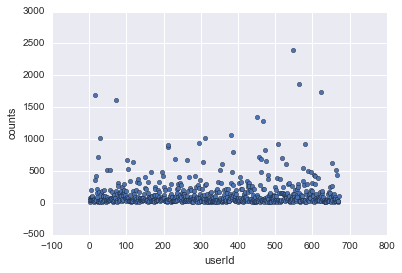

In [11]:
# Scatter plot for the user with number of ratings
Users_df.plot(kind='scatter', x='userId', y='counts')

Based on the previous graphic we identified some outliers and we took the decision to remove them.
Upper and lower fences cordon off outliers from the bulk of data in a set. 

To determine the fence values we used the following values:
- Upper fence = Q3 + (1.5 * IQR)
- Lower fence = Q1 – (1.5 * IQR).

Using Interquartile range (IQR): Q3 - Q1 = 161-37 = 124
- Upper fence = 161 + (1.5*124) = 161+ 186 = 347
- Lower fence = 37 - (1.5*124) = 37 - 186 = -147

Thus, the boundaries of our inner fence are -147 and 347.

**So we decided to remove from our Ratings data set all the users who rated more than 347 movies that we identified as upper fence limit.**

In [12]:
# Calculate how many users rated more than 347 movies
print("Number of users that rated more than 347 movies: %d" %(Users_df['counts'] > 347).sum())

Number of users that rated more than 347 movies: 60


In [13]:
# Create an array that has all the usersId's who rated more than 347 movies, total = 60 users
arr1 = Users_df['userId'].loc[Users_df['counts'] > 347]

# Create new Ratings data set without users who rated more than 347 movies
NewRatings_df = Ratings_df[(Ratings_df['userId'].isin(arr1)==False)]

After removing outiliers our new Ratings data frame has the following:

In [14]:
print 'Number of users = ' + str(NewRatings_df.userId.unique().shape[0]) + ' | Number of movies = ' + \
    str(NewRatings_df.movieId.unique().shape[0])

Number of users = 611 | Number of movies = 6101


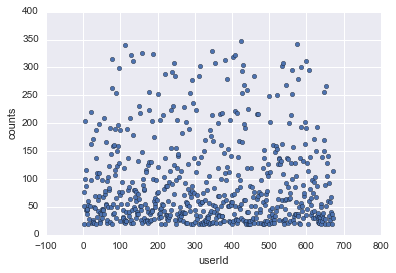

In [111]:
# New data set without 60 users who rated more than 347 movies (outliers)
Usr_df = NewRatings_df.groupby(['userId']).size().reset_index(name='counts')

# Scatter plot for the user with number of ratings
Usr_df.plot(kind='scatter', x='userId', y='counts')

This plot shows the number of rated movies by user, without outliers, and the data appears better distributed.

In [16]:
# Basic stats for the new data set based on the elimination of the users/ratings identified in the outliers 
NewRatings_df.describe()

,userId,movieId,rating,timestamp
count,56768.000000,56768.000000,56768.000000,5.676800e+04
mean,335.731433,10955.359199,3.698281,1.122936e+09
std,188.820803,24467.137689,1.037846,2.033279e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,175.000000,673.000000,3.000000,9.532728e+08
50%,342.000000,2010.000000,4.000000,1.109967e+09
75%,501.000000,4776.000000,4.500000,1.298379e+09
max,671.000000,162672.000000,5.000000,1.476641e+09


It was decided to split the movie title string to get the year that the movie was released - to see which are the years movie relleases garnered the greatest user interest.

In [17]:
# Split Movie title and release year
Movies_df['ORIG_TITLE'] = Movies_df['title']  #Keep the original movie title

for i in range(0, len(Movies_df)):
    str1 = Movies_df.iloc[i]['ORIG_TITLE']
    lenstr1 = len(str1)
    Movies_df.set_value(i,'YEAR', str1[lenstr1-5:lenstr1-1])

In [18]:
# Clean up of movie title and year
Movies_df['title'] = Movies_df['ORIG_TITLE'].str.split('(', 1).str[0].str.strip()
Movies_df['YEAR'] = Movies_df['YEAR'].str.extract('(\d+)', expand=False)

In [19]:
# Movies data frame to verify any missing information (null values)
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 5 columns):
movieId       9125 non-null int64
title         9125 non-null object
genres        9125 non-null object
ORIG_TITLE    9125 non-null object
YEAR          9121 non-null object
dtypes: int64(1), object(4)
memory usage: 356.5+ KB


In [20]:
# Identify any missing values in title in this case a unique movie name was identify and will be populated manually to avoid 
# possible problems of missing information in the analysis
# The movie title is unique because starts with "(" that is used for the release year
Movies_df.loc[Movies_df['title'] == ""]  # movieId = 69757

,movieId,title,genres,ORIG_TITLE,YEAR
7269,69757,,Comedy|Drama|Romance,(500) Days of Summer (2009),2009


In [21]:
# Update manually the missing title
Movies_df.loc[Movies_df['movieId'] == 69757, 'title'] = "(500) Days of Summer"

In [22]:
# Year of 4 movies are null so will be replace by 1000 and be consistent in data format 
print("Total of  movies with no release year: %d" %Movies_df['YEAR'].isnull().sum())
Movies_df.loc[Movies_df['YEAR'].isnull(), 'YEAR'] = "1000"

Total of  movies with no release year: 4


20 years with the highest number of movies released:
     YEAR  counts
86   1996     275
90   2000     273
92   2002     272
88   1998     272
91   2001     267
87   1997     267
85   1995     266
89   1999     261
96   2006     261
97   2007     255
99   2009     255
94   2004     247
98   2008     247
84   1994     240
93   2003     238
95   2005     233
101  2011     227
100  2010     227
103  2013     224
102  2012     222


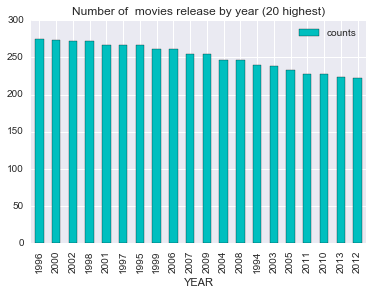

In [23]:
# Checking how many ratings a movie has, in this case was min =1 and max = 341
Moviesg_df = Movies_df.groupby(['YEAR']).size().reset_index(name='counts')
print("20 years with the highest number of movies released:")
print(Moviesg_df.sort_values('counts', ascending=False).head(20))

# Plot of the movies per year
plt.figure(figsize=(25,25))
Moviesg_df.sort_values('counts', ascending=False).head(20).plot('YEAR', kind='bar', color='c', width=0.5, 
                                                                title="Number of  movies release by year (20 highest)");

The table and bar plot displayed above shows the 20 years that movies relaeses had the highest number of ratings submitted, regardles, regardless of the rating value that will be analysed later. 

The following code will use movie genre information to see more statistics in the dataset

In [24]:
# We did a Hot coding for movie's genres to be able to run some reporting on movie genre information 
Movies_df['ACTION'] = np.where(Movies_df['genres'].str.contains("Action")==True,1,0)
Movies_df['ADVENTURE'] = np.where(Movies_df['genres'].str.contains("Adventure")==True,1,0)
Movies_df['ANIMATION'] = np.where(Movies_df['genres'].str.contains("Animation")==True,1,0)
Movies_df['CHILDREN'] = np.where(Movies_df['genres'].str.contains("Children")==True,1,0)
Movies_df['COMEDY'] = np.where(Movies_df['genres'].str.contains("Comedy")==True,1,0)
Movies_df['CRIME'] = np.where(Movies_df['genres'].str.contains("Crime")==True,1,0)
Movies_df['DOCUMENTARY'] = np.where(Movies_df['genres'].str.contains("Documentary")==True,1,0)
Movies_df['DRAMA'] = np.where(Movies_df['genres'].str.contains("Drama")==True,1,0)
Movies_df['FANTASY'] = np.where(Movies_df['genres'].str.contains("Fantasy")==True,1,0)
Movies_df['FILM-NOIR'] = np.where(Movies_df['genres'].str.contains("Film-Noir")==True,1,0)
Movies_df['HORROR'] = np.where(Movies_df['genres'].str.contains("Horror")==True,1,0)
Movies_df['MUSICAL'] = np.where(Movies_df['genres'].str.contains("Musical")==True,1,0)
Movies_df['MYSTERY'] = np.where(Movies_df['genres'].str.contains("Mystery")==True,1,0)
Movies_df['ROMANCE'] = np.where(Movies_df['genres'].str.contains("Romance")==True,1,0)
Movies_df['SCI-FI'] = np.where(Movies_df['genres'].str.contains("Sci-Fi")==True,1,0)
Movies_df['THRILLER'] = np.where(Movies_df['genres'].str.contains("Thriller")==True,1,0)
Movies_df['WAR'] = np.where(Movies_df['genres'].str.contains("War")==True,1,0)
Movies_df['WESTERN'] = np.where(Movies_df['genres'].str.contains("Western")==True,1,0)

In [25]:
# Data frame with columns for each genre
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 23 columns):
movieId        9125 non-null int64
title          9125 non-null object
genres         9125 non-null object
ORIG_TITLE     9125 non-null object
YEAR           9125 non-null object
ACTION         9125 non-null int32
ADVENTURE      9125 non-null int32
ANIMATION      9125 non-null int32
CHILDREN       9125 non-null int32
COMEDY         9125 non-null int32
CRIME          9125 non-null int32
DOCUMENTARY    9125 non-null int32
DRAMA          9125 non-null int32
FANTASY        9125 non-null int32
FILM-NOIR      9125 non-null int32
HORROR         9125 non-null int32
MUSICAL        9125 non-null int32
MYSTERY        9125 non-null int32
ROMANCE        9125 non-null int32
SCI-FI         9125 non-null int32
THRILLER       9125 non-null int32
WAR            9125 non-null int32
WESTERN        9125 non-null int32
dtypes: int32(18), int64(1), object(4)
memory usage: 998.1+ KB


In [26]:
# Creation of a new data frame that holds rates and movies information 
Rating_movies = pd.merge(NewRatings_df, Movies_df, on='movieId')

In [27]:
# Drop the columns that we think are not useful for our model
Rating_movies.drop(['genres', 'timestamp'], axis=1, inplace=True)

In [28]:
Rating_movies

,userId,movieId,rating,title,ORIG_TITLE,YEAR,ACTION,ADVENTURE,ANIMATION,CHILDREN,...,FANTASY,FILM-NOIR,HORROR,MUSICAL,MYSTERY,ROMANCE,SCI-FI,THRILLER,WAR,WESTERN
0,1,31,2.5,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,39,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,88,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,96,31,2.5,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,110,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,111,31,3.5,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Create a new data frame to hold the total of rated movies by genre, keep in mind that one movie 
# can have more than one genre related to it
Totals_df=pd.DataFrame()
Totals_df.set_value(0,'GENRE',"ACTION")
Totals_df.set_value(0,'TOTAL',int((Rating_movies['ACTION'] == 1).sum()))
Totals_df.set_value(1,'GENRE',"ADVENTURE")
Totals_df.set_value(1,'TOTAL',int((Rating_movies['ADVENTURE'] == 1).sum()))
Totals_df.set_value(2,'GENRE',"ANIMATION")
Totals_df.set_value(2,'TOTAL',int((Rating_movies['ANIMATION'] == 1).sum()))
Totals_df.set_value(3,'GENRE',"CHILDREN")
Totals_df.set_value(3,'TOTAL',int((Rating_movies['CHILDREN'] == 1).sum()))
Totals_df.set_value(4,'GENRE',"COMEDY")
Totals_df.set_value(4,'TOTAL',int((Rating_movies['COMEDY'] == 1).sum()))
Totals_df.set_value(5,'GENRE',"CRIME")
Totals_df.set_value(5,'TOTAL',int((Rating_movies['CRIME'] == 1).sum()))
Totals_df.set_value(6,'GENRE',"DOCUMENTARY")
Totals_df.set_value(6,'TOTAL',int((Rating_movies['DOCUMENTARY'] == 1).sum()))
Totals_df.set_value(7,'GENRE',"DRAMA")
Totals_df.set_value(7,'TOTAL',int((Rating_movies['DRAMA'] == 1).sum()))
Totals_df.set_value(8,'GENRE',"FANTASY")
Totals_df.set_value(8,'TOTAL',int((Rating_movies['FANTASY'] == 1).sum()))
Totals_df.set_value(9,'GENRE',"FILM-NOIR")
Totals_df.set_value(9,'TOTAL',int((Rating_movies['FILM-NOIR'] == 1).sum()))
Totals_df.set_value(10,'GENRE',"HORROR")
Totals_df.set_value(10,'TOTAL',int((Rating_movies['HORROR'] == 1).sum()))
Totals_df.set_value(11,'GENRE',"MUSICAL")
Totals_df.set_value(11,'TOTAL',int((Rating_movies['MUSICAL'] == 1).sum()))
Totals_df.set_value(12,'GENRE',"MYSTERY")
Totals_df.set_value(12,'TOTAL',int((Rating_movies['MYSTERY'] == 1).sum()))
Totals_df.set_value(13,'GENRE',"ROMANCE")
Totals_df.set_value(13,'TOTAL',int((Rating_movies['ROMANCE'] == 1).sum()))
Totals_df.set_value(14,'GENRE',"SCI-FI")
Totals_df.set_value(14,'TOTAL',int((Rating_movies['SCI-FI'] == 1).sum()))
Totals_df.set_value(15,'GENRE',"THRILLER")
Totals_df.set_value(15,'TOTAL',int((Rating_movies['THRILLER'] == 1).sum()))
Totals_df.set_value(16,'GENRE',"WAR")
Totals_df.set_value(16,'TOTAL',int((Rating_movies['WAR'] == 1).sum()))
Totals_df.set_value(17,'GENRE',"WESTERN")
Totals_df.set_value(17,'TOTAL',int((Rating_movies['WESTERN'] == 1).sum()))
print(Totals_df)

          GENRE    TOTAL
0        ACTION  16437.0
1     ADVENTURE  13893.0
2     ANIMATION   4023.0
3      CHILDREN   5432.0
4        COMEDY  21504.0
5         CRIME   9459.0
6   DOCUMENTARY    634.0
7         DRAMA  24911.0
8       FANTASY   6482.0
9     FILM-NOIR    555.0
10       HORROR   3434.0
11      MUSICAL   2719.0
12      MYSTERY   4303.0
13      ROMANCE  11204.0
14       SCI-FI   9543.0
15     THRILLER  14608.0
16          WAR   3039.0
17      WESTERN   1023.0


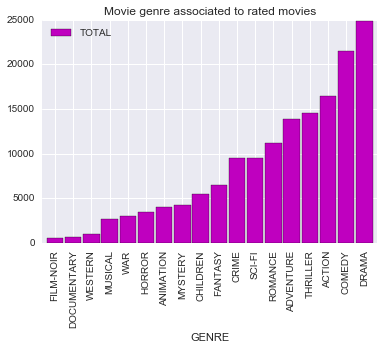

In [30]:
# Plot of the rated movie genre
plt.figure(figsize=(25,25))
Totals_df.sort_values('TOTAL').plot('GENRE', kind='bar', color='m', width=0.9, title="Movie genre associated to rated movies");

This plot displays the number of rated movies associated to a genre. Note, that one movie can have more that one genre associated to it. 

We found the top 5 genres associated with movie ratings were: Drama, Comedy, Action, Thriller and Adventure.
The bottom 3 genres associated with movie ratings were: Film-noir, Documentary and Western. 

We were interested to see the tags submitted by the users to the most rated movie genres. So, we created some word clouds to visualize this information with the following code. Includes the use of a drop down selection widget, to select one of the top 5 genres to visualize the tags related to them.

In [31]:
#Creating a dataframe that has all rated movies that a user submitted a tag for the rated movie.
movies_words = pd.merge(Rating_movies, Tags_df, on=['userId', 'movieId'])

In [32]:
#Creating the text that contains all the tags for ACTION movies with ratings higher than 3.5
wactionH = movies_words.loc[(movies_words['ACTION'] == 1) & (movies_words['rating']> 3.5)]
Htext = ' '.join(wactionH.tag)
wactionL = movies_words.loc[(movies_words['ACTION'] == 1) & (movies_words['rating']< 2)]
Ltext = ' '.join(wactionL.tag)
print("Number of ACTION movies with higher ratings with tags: %d" %len(wactionH))
print("Number of ACTION movies with lower ratings less than 2 with tags: %d" %len(wactionL))

Number of ACTION movies with higher ratings with tags: 113
Number of ACTION movies with lower ratings less than 2 with tags: 27


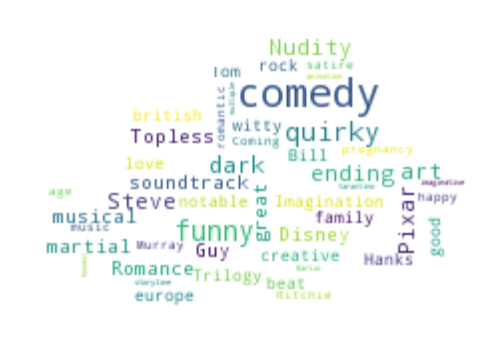

In [33]:
# Create the word clouds based on the tags related to the highest rated movies by genre. 
# Considering the 5 top movies rated -regardless of the rating value-
# Dropdown widget was used to be able to select the movie genre to display the correspondent word-cloud plot
from ipywidgets import widgets
import ipywidgets
from IPython.display import clear_output
from scipy.misc import imread

choose_task = widgets.Dropdown(
    options=['Select', 'Action', 'Adventure', 'Comedy', 'Drama', 'Thriller'],
    value='Select',
    description="Movie Genre:"
)

def on_change(change):
    clear_output()
    if change['type'] == 'change' and change['name'] == 'value':
        print "changed to %s" % change['new']
        if change['new'] == 'Adventure':            
            wt = movies_words.loc[(movies_words['ADVENTURE'] == 1) & (movies_words['rating']> 3.5)]
        else :
            if change['new'] == 'Action':  
                wt = movies_words.loc[(movies_words['ACTION'] == 1) & (movies_words['rating']> 3.5)]
            else :
                if change['new'] == 'Drama':  
                    wt = movies_words.loc[(movies_words['DRAMA'] == 1) & (movies_words['rating']> 3.5)]
                else :
                    if change['new'] == 'Comedy':  
                        wt = movies_words.loc[(movies_words['COMEDY'] == 1) & (movies_words['rating']> 3.5)]
                    else :
                        if change['new'] == 'Thriller':  
                            wt = movies_words.loc[(movies_words['THRILLER'] == 1) & (movies_words['rating']> 3.5)]
                        else :
                            return
        text = ' '.join(wt.tag)
        wc = WordCloud(background_color="white", max_words=200, max_font_size=20, random_state=42, mask=imread('cloud.png'))
        # generate word cloud
        wc.generate(text)

        # show
        plt.figure(figsize=(8,8))
        plt.imshow(wc)
        plt.axis("off")
    return

print("Select Movie Genre to display the tags related to movies with highest ratings.")
choose_task.observe(on_change)
choose_task


Above, we show the word cloud for the Comedy genre.

Now, we wanted to know the popularity of the movie based on the number of submitted ratings and rating value, so a data frame was created that contains the movie title with the number of total reviewers and the average rating value (mean) for this and some visualization is displayed bellow.

In [34]:
# Creationg of dataframe to see movie popularity 
mg_df = Rating_movies.groupby(['title'])
Mov_df = Rating_movies.groupby(['title']).size().reset_index(name='Total Reviewers')
grid = pd.merge(Mov_df, mg_df.mean()['rating'].reset_index(), on=['title'])

In [35]:
# 10 Least popular movies
grid.sort_values(['Total Reviewers','rating'], ascending=True).head(10)

,title,Total Reviewers,rating
3,'Neath the Arizona Skies,1,0.5
4,'Round Midnight,1,0.5
19,100 Rifles,1,0.5
172,After Earth,1,0.5
224,All I Want for Christmas,1,0.5
257,Amelia,1,0.5
401,As it is in Heaven,1,0.5
455,Baby Geniuses,1,0.5
509,Bangkok Dangerous,1,0.5
521,Barney's Great Adventure,1,0.5


In [36]:
# 10 Most popular movies
grid.sort_values(['Total Reviewers','rating'], ascending=False).head(10)

,title,Total Reviewers,rating
1945,Forrest Gump,285,4.101754
4203,Pulp Fiction,271,4.214022
4656,"Shawshank Redemption, The",263,4.517110
4715,"Silence of the Lambs, The",253,4.134387
4924,Star Wars: Episode IV - A New Hope,239,4.209205
2840,Jurassic Park,223,3.708520
3360,"Matrix, The",213,4.169014
4539,Schindler's List,202,4.287129
5398,Toy Story,200,3.915000
5161,Terminator 2: Judgment Day,193,4.038860


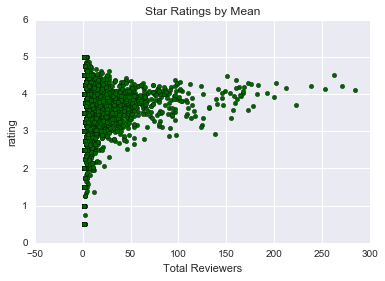

In [37]:
grid.plot.scatter(x='Total Reviewers', y='rating', color='DarkGreen', title="Star Ratings by Mean");

This plot shows the total reviews and the average rating value for each movie in the data set. Using this scatterplot, we can easily identify the distribution of 10 most popular movies, the most reviewed movies, and the least popular movies.

       Total Reviewers       rating
count      5943.000000  5943.000000
mean          9.552078     3.529027
std          21.041302     0.916930
min           1.000000     0.500000
25%           1.000000     3.000000
50%           2.000000     3.675000
75%           8.000000     4.000000
max         285.000000     5.000000


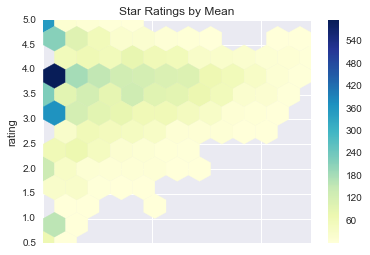

In [38]:
print (grid.describe())
grid.plot(x='Total Reviewers', y='rating', kind='hexbin', xscale='log',
                  cmap='YlGnBu', gridsize=12, mincnt=1, 
                  title="Star Ratings by Mean")

plt.show()

In this plot, when we display the mean against the number of reviews for the entire movie ratings data set, a pattern begins to clearly emerge. It shows that the average rating of a movie is actually slightly higher than 2.5. 

There is a strong cluster of movies with approximately 550 reviewers, whose simple mean rating surrounds 3.8, not 3.5. 

This contrasts with the right side of the figure, where you can clearly see that the most number of ratings (75%) is between 3.5 and 4.0 (when there are few reviewers in comparison with the left side).

The figure visually calls our attention to a problem. When there are less than 5 reviewers, there are dramatic tails that ensure equally high and low reviews. 

So another plot was generated with movies with more than 5 reviews to visualize the differences.

       Total Reviewers       rating
count      1914.000000  1914.000000
mean         25.665099     3.632184
std          31.445905     0.492187
min           6.000000     1.375000
25%           8.000000     3.345159
50%          14.000000     3.688820
75%          29.000000     4.000000
max         285.000000     4.857143


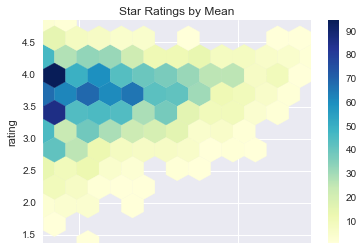

In [39]:
print (grid.loc[grid['Total Reviewers'] > 5].describe())

grid.loc[grid['Total Reviewers'] > 5].plot(x='Total Reviewers', y='rating', kind='hexbin', xscale='log',
                  cmap='YlGnBu', gridsize=12, mincnt=1, 
                  title="Star Ratings by Mean")

plt.show()

In the latest plot the average rating is 3.6 the means are better distributed. So we can state that the mean rating is good indicator when we have more than 5 reviews per movie.
So, is always good to have more reviews for better results per movies. User feedback/rating is verys useful for future predictions and recommendations. 

So, we decided to remove all the movies that has less than 6 reviews, the following code takes care of that.

In [40]:
# Checking how many ratings a movie has, in this case was min =1 and max = 341
Moviesg_df = Rating_movies.groupby(['movieId']).size().reset_index(name='counts')
Moviesg_df.describe()

,movieId,counts
count,6101.000000,6101.000000
mean,24764.752827,9.304704
std,36787.379138,20.736064
min,1.000000,1.000000
25%,2137.000000,1.000000
50%,4623.000000,2.000000
75%,42163.000000,8.000000
max,162672.000000,285.000000


In [41]:
# Create an array that has all the movieId's with less than 6 reviews
arr2 = Moviesg_df['movieId'].loc[Moviesg_df['counts'] < 6]

In [42]:
# Create new Ratings data set without movies with less than 6 reviews
Rated_movies = Rating_movies[(Rating_movies['movieId'].isin(arr2)==False)]


In the following data set, these outliers have been removed, and it shall be used for the recommendation models.

In [43]:
# Data set ready to be used in the models
Rated_movies

,userId,movieId,rating,title,ORIG_TITLE,YEAR,ACTION,ADVENTURE,ANIMATION,CHILDREN,...,FANTASY,FILM-NOIR,HORROR,MUSICAL,MYSTERY,ROMANCE,SCI-FI,THRILLER,WAR,WESTERN
0,1,31,2.5,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,39,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,88,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,96,31,2.5,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,110,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,111,31,3.5,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
print 'Number of users = ' + str(Rated_movies.userId.unique().shape[0]) + ' | Number of movies = ' + \
    str(Rated_movies.movieId.unique().shape[0])

Number of users = 611 | Number of movies = 1926


<a id="MandE"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 

**In this section, we begin the process of creating recommendation models and evaluate them critically.**

In the following cells, we begin the first steps of the modeling process after looking at the structure. Graphlab was used for the recommender system creation, including S_Frames, that are scalable data frames that are lazily evaluated. Please refer to the comments in each cell for more description.

In [45]:
# Data set that was already processed after the Initial Analysis described above
Rated_movies.head(5)

,userId,movieId,rating,title,ORIG_TITLE,YEAR,ACTION,ADVENTURE,ANIMATION,CHILDREN,...,FANTASY,FILM-NOIR,HORROR,MUSICAL,MYSTERY,ROMANCE,SCI-FI,THRILLER,WAR,WESTERN
0,1,31,2.5,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,31,4.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,31,3.0,Dangerous Minds,Dangerous Minds (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# We used graphlab Turi tools for the models
Rating_movies_sf = gl.SFrame(Rated_movies)

This non-commercial license of GraphLab Create for academic use is assigned to adlopez@mail.smu.edu and will expire on April 06, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\ALMA_L~1\AppData\Local\Temp\graphlab_server_1523824227.log.0


In [47]:
#create the train and test splits, with a seed to reproduce results.
#We chose 80% of the records for training and 20% for testing.
train, test = gl.recommender.util.random_split_by_user(Rating_movies_sf, user_id="userId", item_id="title", 
                                                       item_test_proportion=0.2, random_seed=2018)

In [48]:
#For intution, here is a portion of the test split.
test.head(5)

Columns:
	userId	int
	movieId	int
	rating	float
	title	str
	ORIG_TITLE	str
	YEAR	str
	ACTION	int
	ADVENTURE	int
	ANIMATION	int
	CHILDREN	int
	COMEDY	int
	CRIME	int
	DOCUMENTARY	int
	DRAMA	int
	FANTASY	int
	FILM-NOIR	int
	HORROR	int
	MUSICAL	int
	MYSTERY	int
	ROMANCE	int
	SCI-FI	int
	THRILLER	int
	WAR	int
	WESTERN	int

Rows: 5

Data:
+--------+---------+--------+-----------------+------------------------+------+
| userId | movieId | rating |      title      |       ORIG_TITLE       | YEAR |
+--------+---------+--------+-----------------+------------------------+------+
|   36   |    31   |  3.0   | Dangerous Minds | Dangerous Minds (1995) | 1995 |
|   88   |    31   |  3.0   | Dangerous Minds | Dangerous Minds (1995) | 1995 |
|  111   |    31   |  3.5   | Dangerous Minds | Dangerous Minds (1995) | 1995 |
|  186   |    31   |  3.0   | Dangerous Minds | Dangerous Minds (1995) | 1995 |
|  288   |    31   |  3.0   | Dangerous Minds | Dangerous Minds (1995) | 1995 |
+--------+---------+--------+-----------------+------------------------+------+
+--------+-----------+-----------+----------+--------+-------+-------------+-------+
| ACTION | ADVENTURE | ANIMATION | CHILDREN | COMEDY | CRIME | DOCUMENTARY | DRAMA |
+--------+-----------+-----------+----------+--------+-------+-------------+-------+
|   0    |     0     |     0     |    0     |   0    |   0   |      0      |   1   |
|   0    |     0     |     0     |    0     |   0    |   0   |      0      |   1   |
|   0    |     0     |     0     |    0     |   0    |   0   |      0      |   1   |
|   0    |     0     |     0     |    0     |   0    |   0   |      0      |   1   |
|   0    |     0     |     0     |    0     |   0    |   0   |      0      |   1   |
+--------+-----------+-----------+----------+--------+-------+-------------+-------+
+---------+-----------+--------+---------+---------+---------+-----+
| FANTASY | FILM-NOIR | HORROR | MUSICAL | MYSTERY | ROMANCE | ... |
+---------+-----------+--------+---------+---------+---------+-----+
|    0    |     0     |   0    |    0    |    0    |    0    | ... |
|    0    |     0     |   0    |    0    |    0    |    0    | ... |
|    0    |     0     |   0    |    0    |    0    |    0    | ... |
|    0    |     0     |   0    |    0    |    0    |    0    | ... |
|    0    |     0     |   0    |    0    |    0    |    0    | ... |
+---------+-----------+--------+---------+---------+---------+-----+
[5 rows x 24 columns]

In [49]:
#Next, the second model shall include supplementary item data.
#We create that, to adjust model paramters, below.

#This supplementary data allows us to incorporate years and genres.

train_side_info = train.select_columns(['title','YEAR','ACTION','ADVENTURE','COMEDY','CRIME','DOCUMENTARY',
                                        'DRAMA','FANTASY','FILM-NOIR','HORROR','MUSICAL','MYSTERY','ROMANCE',
                                        'SCI-FI','THRILLER'])

test_side_info = test.select_columns(['title','YEAR','ACTION','ADVENTURE','COMEDY','CRIME','DOCUMENTARY','DRAMA',
                                      'FANTASY','FILM-NOIR','HORROR','MUSICAL','MYSTERY','ROMANCE','SCI-FI','THRILLER'])

test_side_info.head(5)

Columns:
	title	str
	YEAR	str
	ACTION	int
	ADVENTURE	int
	COMEDY	int
	CRIME	int
	DOCUMENTARY	int
	DRAMA	int
	FANTASY	int
	FILM-NOIR	int
	HORROR	int
	MUSICAL	int
	MYSTERY	int
	ROMANCE	int
	SCI-FI	int
	THRILLER	int

Rows: 5

Data:
+-----------------+------+--------+-----------+--------+-------+-------------+-------+
|      title      | YEAR | ACTION | ADVENTURE | COMEDY | CRIME | DOCUMENTARY | DRAMA |
+-----------------+------+--------+-----------+--------+-------+-------------+-------+
| Dangerous Minds | 1995 |   0    |     0     |   0    |   0   |      0      |   1   |
| Dangerous Minds | 1995 |   0    |     0     |   0    |   0   |      0      |   1   |
| Dangerous Minds | 1995 |   0    |     0     |   0    |   0   |      0      |   1   |
| Dangerous Minds | 1995 |   0    |     0     |   0    |   0   |      0      |   1   |
| Dangerous Minds | 1995 |   0    |     0     |   0    |   0   |      0      |   1   |
+-----------------+------+--------+-----------+--------+-------+-------------+-------+
+---------+-----------+--------+---------+---------+---------+--------+----------+
| FANTASY | FILM-NOIR | HORROR | MUSICAL | MYSTERY | ROMANCE | SCI-FI | THRILLER |
+---------+-----------+--------+---------+---------+---------+--------+----------+
|    0    |     0     |   0    |    0    |    0    |    0    |   0    |    0     |
|    0    |     0     |   0    |    0    |    0    |    0    |   0    |    0     |
|    0    |     0     |   0    |    0    |    0    |    0    |   0    |    0     |
|    0    |     0     |   0    |    0    |    0    |    0    |   0    |    0     |
|    0    |     0     |   0    |    0    |    0    |    0    |   0    |    0     |
+---------+-----------+--------+---------+---------+---------+--------+----------+
[5 rows x 16 columns]

<a id="train"></a>
### Modeling and Evaluation 1: Train and adjust parameters

In [50]:
#First, we train the first model without the supplementary item data.

#to test with graphlab user splits
#make first training model - a user-item collaborative-filtering
#recommender system.
#We use 32 latent factors for this recommender system.
train_model1 = gl.recommender.ranking_factorization_recommender.create(train, user_id="userId", item_id="title", target = "rating")
train_model1_results = train_model1.recommend(users=None, k=5)
train_model1.save("train_model1")

#This first recommender system, "train_model1", has an overall RMSE 
#of 0.984707.Next, we will see how this compares to the second model.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 39123 observations with 611 users and 1902 items.

Data prepared in: 0.253s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 39123 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.17391           | Not Viable                               |

| 1       | 0.543478          | Not Viable                               |

| 2       | 0.13587           | 0.847064                                 |

| 3       | 0.0679348         | 1.11276                                  |

| 4       | 0.0339674         | 0.874763                                 |

| 5       | 0.0169837         | 1.42336                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.13587           | 0.847064                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1ms          | 2.0274            | 1.01689               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 282ms        | DIVERGED          | DIVERGED              | 0.13587     |

| RESET   | 369ms        | 2.02741           | 1.01686               |             |

| 1       | 661ms        | 9.00456           | 2.60704               | 0.0679348   |

| 2       | 924ms        | 2.24102           | 1.12768               | 0.0679348   |

| 3       | 1.16s        | 2.51721           | 1.19847               | 0.0679348   |

| 4       | 1.35s        | 2.02546           | 1.06484               | 0.0679348   |

| 5       | 1.55s        | 1.81727           | 1.033                 | 0.0679348   |

| 6       | 1.79s        | 1.92696           | 1.11962               | 0.0679348   |

| 9       | 2.41s        | 2.56454           | 1.40371               | 0.0679348   |

| 11      | 2.76s        | 2.34802           | 1.34039               | 0.0679348   |

| 14      | 3.42s        | 1.87079           | 1.16523               | 0.0679348   |

| 19      | 4.31s        | 1.5532            | 1.04999               | 0.0679348   |

| 24      | 5.27s        | 1.62619           | 1.0941                | 0.0679348   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.3823

Final training RMSE: 0.984707

In [51]:
#Second, we train the second model with the supplementary item data.


#to test with graphlab user splits
#make first training model - user-item collaborative-filtering
#recommender system.
#We use 32 latent factors for this recommender system.
train_model2 = gl.recommender.ranking_factorization_recommender.create(train, user_id="userId", item_id="title", 
                                                                       item_data=train_side_info, target="rating")
train_model2_results = train_model2.recommend(users=None, k=5)
train_model2.save("train_model2")

#This second recommender system, "train_model2", has an overall RMSE 
#of 0.729079. Therefore, on the training data, train_model2 performs 
#better than train_model1. However, this performance only shows how 
#well each recommender system fits to the training data. To truly 
#evaluate and compare model performance, we need to see how each 
#recommender system generalizes to the test data set.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 39123 observations with 611 users and 1902 items.

Data prepared in: 0.274s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 39123 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.31579           | Not Viable                               |

| 1       | 0.328947          | Not Viable                               |

| 2       | 0.0822368         | Not Viable                               |

| 3       | 0.0205592         | 0.950632                                 |

| 4       | 0.0102796         | 1.30528                                  |

| 5       | 0.0051398         | 1.59269                                  |

| 6       | 0.0025699         | 1.78808                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0205592         | 0.950632                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 2.02764           | 1.01688               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 334ms        | 1.55992           | 0.983706              | 0.0205592   |

| 2       | 687ms        | 1.22374           | 0.908463              | 0.0205592   |

| 3       | 1.09s        | 1.06855           | 0.873671              | 0.0205592   |

| 4       | 1.42s        | 0.96842           | 0.849651              | 0.0205592   |

| 5       | 1.80s        | 0.903009          | 0.831801              | 0.0205592   |

| 6       | 2.08s        | 0.855516          | 0.820041              | 0.0205592   |

| 10      | 3.25s        | 0.748748          | 0.787123              | 0.0205592   |

| 11      | 3.50s        | 0.732178          | 0.781201              | 0.0205592   |

| 15      | 4.61s        | 0.686398          | 0.764352              | 0.0205592   |

| 20      | 5.64s        | 0.649498          | 0.749584              | 0.0205592   |

| 25      | 6.73s        | 0.628753          | 0.7394                | 0.0205592   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.61277

Final training RMSE: 0.729079

<a id="eval"></a>

### Modeling and Evaluation 2: Evaluate and Compare
** To begin the evaluation and comparison of recommender system 1 and 2, we first review the training results. These results will provide initial comparisons between the two recommender systems prior to running them on the test data. **

In [52]:
#For train_model1, we explore a subset of what the results look 
#like for the first recommender system.

train_model1_results 

#We see below the top 5 recommendations for two users in the training
#data. Their userId is provided, along with movies recommended, the
#overall score of the movies (based on average reviews), and last,
#the ranking of these top 5 movie recommendations for the user.

userId,title,score,rank
1,Star Wars: Episode IV - ANew Hope ...,3.9992292173,1
1,"Shawshank Redemption, The",3.89861820114,2
1,American Beauty,3.82786665333,3
1,Forrest Gump,3.81863395346,4
1,"Silence of the Lambs, The",3.73630734754,5
7,American Beauty,4.50366387737,1
7,"Lord of the Rings: TheFellowship of the Ring, ...",4.31567129714,2
7,Schindler's List,4.25173303706,3
7,"Silence of the Lambs, The",4.23375702871,4
7,"Sixth Sense, The",4.22057827038,5


In [53]:
#For train_model2, we explore a subset of what the results look 
#like for the second recommender system.

train_model2_results

#As before, we have the same two user's movie recommendations in the
#training data set. However, these movies are slightly different.
#By adding the genre and year information as supplementary item data,
#the recommendations have changed for the two users.

userId,title,score,rank
1,Star Wars: Episode V -The Empire Strikes Back ...,3.77180702593,1
1,Gladiator,3.62052062251,2
1,"Godfather, The",3.61304121115,3
1,"Lord of the Rings: TheFellowship of the Ring, ...",3.55501683565,4
1,Shrek,3.49306903621,5
7,"Lord of the Rings: TheFellowship of the Ring, ...",3.91611138439,1
7,Star Wars: Episode V -The Empire Strikes Back ...,3.72142521785,2
7,"Matrix, The",3.60624966987,3
7,"Lord of the Rings: TheTwo Towers, The ...",3.58106133911,4
7,Gladiator,3.55674092825,5


In [54]:
# To take this comparison of the two recommendations one step further,
# below we show how the recommender systems can show movie 
# recommendations for individual users. These users can be manually
# selected, to provide targeted recommendations. This serves as a 
# proof of concept for our final recommendations on the test data set.

#generate recommendations for 1 user, user 5 with model 1 using training data
user5recommendations_model1 = train_model1.recommend(users=["5"])
user5recommendations_model1

#Now, we can generate 10 recommendations for a chosen user. This
#will hopefully keep the user occupied until we get more rating 
#feedback data from them to update their recommendations later.

userId,title,score,rank
5,Star Wars: Episode IV - ANew Hope ...,4.81436828,1
5,American Beauty,4.78214279038,2
5,"Matrix, The",4.67363386077,3
5,Star Wars: Episode V -The Empire Strikes Back ...,4.66769959254,4
5,Terminator 2: JudgmentDay ...,4.60149345023,5
5,Forrest Gump,4.60041238589,6
5,Indiana Jones and theLast Crusade ...,4.58474807662,7
5,Back to the Future,4.55486768705,8
5,"Silence of the Lambs, The",4.55340290291,9
5,"Shawshank Redemption, The",4.53126843495,10


In [55]:
#We do the same for the training data, as in the previous cell, for
#the second recommender system.

#generate recommendations for 1 user, user 5 with model 2 using training data
user5recommendations_model2 = train_model2.recommend(users=["5"])
user5recommendations_model2

#As you can see, the recommendations are a bit different.

userId,title,score,rank
5,"Shawshank Redemption, The",3.93719007268,1
5,Pulp Fiction,3.85036911168,2
5,Star Wars: Episode V -The Empire Strikes Back ...,3.8346573655,3
5,Star Wars: Episode IV - ANew Hope ...,3.74300852958,4
5,Star Wars: Episode VI -Return of the Jedi ...,3.70701998477,5
5,"Silence of the Lambs, The",3.69484363734,6
5,Forrest Gump,3.68530779569,7
5,Gladiator,3.64694806955,8
5,"Lord of the Rings: TheFellowship of the Ring, ...",3.57505011982,9
5,Fargo,3.57170151598,10


** At this point, we have created our two recommender systems that each have been created using different parameters. **

** The first recommender system includes no supplementary item data. It only includes the users, movie titles, and their ratings - to inform personalized recommendations. **

** The second recommender system includes additional supplementary item data, to include year and genre information associated with each movie. Furthermore, the second recommender system includes all of the other information that the first recommender system has. **

** To make an informed decision on which recommender system should be deployed in a production environment, we need to see how each generalizes to the test data. We begin this process, below. After all, the second recommender system's initial better performance may just mean that it has overfit to the training data.**

In [56]:
#Here, we compare the first and second recommender systems performance 
#on the test data set to see how they each generalize. 

#compare the first recommender system to the second.
comparison = gl.recommender.util.compare_models(test, [train_model1, train_model2])

#The first recommender system has an overall RMSE of ~ 1.0531.
#The second recommender system has an overall RMSE of ~ 1.0395.

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |  0.128289473684 | 0.00806542845917 |
|   2    |  0.107730263158 | 0.0131474798443  |
|   3    | 0.0997807017544 | 0.0195660703678  |
|   4    |  0.100740131579 | 0.0257726749453  |
|   5    | 0.0953947368421 | 0.0323415810335  |
|   6    | 0.0921052631579 | 0.0372376306997  |
|   7    | 0.0869360902256 | 0.0409667016476  |
|   8    | 0.0838815789474 | 0.0442886372436  |
|   9    | 0.0820540935673 | 0.0481098201159  |
|   10   | 0.0796052631579 | 0.0512380236566  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.053180109832905)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  549   |   2   | 0.163216164391 |
+--------+-------+--

** If we evaluate the models only based on RMSE, the second recommender system generalizes the best to the test data. However, we can also use precision and recall to evaluate and compare each model statistically. **

** We assess the precision and recall of each recommender system on the test dataset, below. **

In [57]:
#First we review the first recommender system's precision and recall
#on the test data. To do this, we must first generate the results.

rmse_results_train1 = train_model1.evaluate(test)


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |  0.128289473684 | 0.00806542845917 |
|   2    |  0.107730263158 | 0.0131474798443  |
|   3    | 0.0997807017544 | 0.0195660703678  |
|   4    |  0.100740131579 | 0.0257726749453  |
|   5    | 0.0953947368421 | 0.0323415810335  |
|   6    | 0.0921052631579 | 0.0372376306997  |
|   7    | 0.0869360902256 | 0.0409667016476  |
|   8    | 0.0838815789474 | 0.0442886372436  |
|   9    | 0.0820540935673 | 0.0481098201159  |
|   10   | 0.0796052631579 | 0.0512380236566  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.053180109832905)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  549   |   2   | 0.163216164391 |
+--------+-------+----------------+
[1 rows x 3 

In [58]:
import graphlab.aggregate as agg

rmse_results_train1['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),
                                                                  agg.AVG('recall'),agg.STD('recall')]).print_rows(num_rows=100)


+--------+------------------+-------------------+------------------+
| cutoff | Avg of precision | Stdv of precision |  Avg of recall   |
+--------+------------------+-------------------+------------------+
|   16   | 0.0737047697368  |  0.0898109880762  | 0.0757718314389  |
|   10   | 0.0796052631579  |   0.108117148811  | 0.0512380236566  |
|   36   | 0.0529057017544  |  0.0589305949357  |  0.119254840772  |
|   26   | 0.0600328947368  |  0.0670858902409  | 0.0993745893214  |
|   41   | 0.0498636071887  |  0.0553025319864  |  0.128501851664  |
|   3    | 0.0997807017544  |   0.188057036519  | 0.0195660703678  |
|   1    |  0.128289473684  |   0.334411848812  | 0.00806542845917 |
|   6    | 0.0921052631579  |   0.137914014768  | 0.0372376306997  |
|   11   | 0.0793959330144  |   0.10513979406   | 0.0557923543892  |
|   2    |  0.107730263158  |   0.220993821966  | 0.0131474798443  |
|   46   | 0.0472683066362  |  0.0515703291658  |  0.13685113664   |
|   31   | 0.0556557724958  |  0.0

** Before we analyze the precision and recall, we review their definitions:**


** Precision: As defined from wikipedia (https://en.wikipedia.org/wiki/Precision_and_recall), "precision is the number of correct results divided by the number of all returned results." In the case above, precision is provided as a cut-off rank, which can be summarized as the precision at a particular value of n. Ideally, we want precision to be as close to 1 as possible, such that a larger relative value of precision is better. When we have larger values of precision, we can say we are retreiving more correct movie recommendations for the user relative to all available rated movies. **

** Recall: As defined from wikipedia (https://en.wikipedia.org/wiki/Precision_and_recall), "recall is the number of correct results divided by the number of results that should have been retreived." As stated for precision, the recall values above are based on a cut-off rank. Ideally, we also want the recall to be as close to 1 as possible, while simulataneously also controlling for the unrelated movie recommendations. This is why we must present both precision and recall. **

When looking at the average precision and recall results for the cut-off ranks above, we want the average precision and recall to both be as high as possible (close to 1) while also having the smallest standard deviation possible for precision and recall. For cut-off rank 1,2, and 3, we have very poor recall relative to the precision. The cut-off ranks increase as we provide more recommendations to a user. As the cut-off ranks increase, our precision and recall tends to increase, but there is a practical balance of how many movies is actually useful to recommend at a time to a user. **If we provide 10 recommendations to an individual, the average recall is 0.0512380236566, while the precision is 0.0796052631579 with the first recommender system. With 10 recommendations, the standard deviation of the precision is 0.108117148811 and the standard deviation of the recall is 0.0859938301789.**

In [59]:
#Next, we review the second recommender system's precision and recall
#on the test data. To do this, we must generate the results.

rmse_results_train2 = train_model2.evaluate(test)


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |  0.113486842105 | 0.00712054851107 |
|   2    |  0.101973684211 | 0.0120187318889  |
|   3    | 0.0959429824561 | 0.0165665979427  |
|   4    | 0.0933388157895 | 0.0217879318725  |
|   5    | 0.0881578947368 |  0.025558435335  |
|   6    | 0.0844298245614 | 0.0298355834434  |
|   7    | 0.0789473684211 | 0.0321453253554  |
|   8    | 0.0777138157895 | 0.0367631087335  |
|   9    | 0.0747441520468 |  0.040171476261  |
|   10   | 0.0730263157895 | 0.0434450983925  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.9324538080155241)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  438   |   1   | 0.105737141544 |
+--------+-------+----------------+
[1 rows x 3

In [60]:
# Now, we can present the precision and recall results for the second
# recommender system. These results can be found, below.

rmse_results_train2['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),
                                                                  agg.AVG('recall'),agg.STD('recall')]).print_rows(num_rows=100)

+--------+------------------+-------------------+------------------+
| cutoff | Avg of precision | Stdv of precision |  Avg of recall   |
+--------+------------------+-------------------+------------------+
|   16   | 0.0632195723684  |  0.0875454904033  |  0.063099488508  |
|   10   | 0.0730263157895  |   0.113827197481  | 0.0434450983925  |
|   36   | 0.0456871345029  |  0.0559795493456  |  0.104905534578  |
|   26   | 0.0513031376518  |  0.0663835860687  | 0.0844661261793  |
|   41   | 0.0432846598203  |  0.0525662130246  |  0.112034095213  |
|   3    | 0.0959429824561  |   0.203509923951  | 0.0165665979427  |
|   1    |  0.113486842105  |   0.317186977624  | 0.00712054851107 |
|   6    | 0.0844298245614  |   0.149312154041  | 0.0298355834434  |
|   11   | 0.0717703349282  |   0.108812233246  | 0.0477410635517  |
|   2    |  0.101973684211  |   0.238821226558  | 0.0120187318889  |
|   46   | 0.0415117276888  |  0.0493719310703  |  0.119126203076  |
|   31   | 0.0472198641766  |  0.0

**Remember that for the first recommender system, if we provide 10 recommendations to an individual, the average recall is 0.0512380236566, while the precision is 0.0796052631579 with the first recommender system. With 10 recommendations, the standard deviation of the recall is 0.0859938301789 and the standard deviation of the precision is 0.108117148811.**

For the second recommender to have better precision and recall than the first recommender system, the average precision and recall need to be higher with 10 recommendations with ideally lower standard deviation for each. ** With the second recommender system at 10 recommendations, the average recall is 0.0434450983925  and the average precision is 0.0730263157895. Then, the standard deviation of the recall is 0.0728465836168 and the standard deviation of the precision is 0.113827197481. **

It seems that the precision and recall are a little worse on average with the second recommender system, with some additional variability for these estimates compared to the first recommender system. **We will discuss the pros and cons of evaluating the two recommender systems based on RMSE vs Precision and Recall in the modeling and evaluation 4 section.** 

** In the next section, Modeling and Evaluation 3: Visualize Results, we visualize the results between each recommender system.** 

<a id="visualize"></a>

### Modeling and Evaluation 3: Visualize Results

** In this section, we explore visually the output of the results generated in the Modeling and Evaluation 2 section. **

We begin with comparing the RMSE for both recommender systems with histograms.

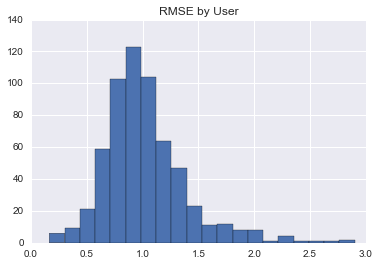

In [98]:
#visualize the results of the first model on the test dataset.
#code from the 13. Recommender Systems example

rmsevals1 = rmse_results_train1['rmse_by_user']['rmse']
rmsevals1 = rmsevals1[rmse_results_train1['rmse_by_user']['count']]

plt.hist(rmsevals1,bins=20)
plt.title('RMSE by User')
plt.show()

In the histogram of the RMSE by user above, we visualize the RMSE on a user basis for the first recommender system. The average RMSE by user is appoximately 1 with the majority of values being contained in the interval (0.1, 2.0). There are a small number of users who had an RMSE greater than 2.5.

It is important to clarify that this is the RMSE regarding their ratings that differed in the test dataset compared to the training dataset. If this RMSE per user is comparatively smaller in one recommender system vs. another, we have a better sense of how users actually will rate movies, based on their previous habits. We can use this information to produce better movie recommendations.

Next, we show the RMSE by user for the second recommender system.

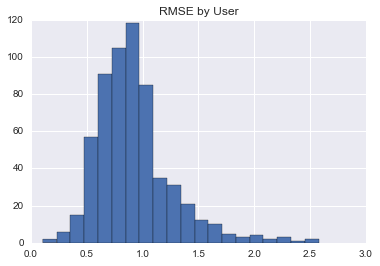

In [99]:
#visualize the results of the first model on the test dataset.
#code from the 13. Recommender Systems example

rmsevals2 = rmse_results_train2['rmse_by_user']['rmse']
rmsevals2 = rmsevals2[rmse_results_train2['rmse_by_user']['count']]

plt.hist(rmsevals2,bins=20)
plt.title('RMSE by User')
plt.show()


In the histogram of the RMSE by user above, we visualize the RMSE on a user basis for the second recommender system. The average RMSE by user is appoximately 0.9 with the majority of values being contained in the interval (0.1, 2.0). There appears visually to be no users who have a RMSE greater than 2.5.

While the RMSE by user is very similar in the second recommender system to the first, the average RMSE has clearly dropped in second recommender. This provides further evidence to use the second recommender system instead of the first.

**Next, to visualize the precision and recall for both recommender systems, we output the previous precision and recall results to Excel, and import them in as a csv file. This csv file is read in, shown, and visualized in the following cells. **

In [77]:
#Load the data with the results of the models  
filename = 'C:/Alma@SMU/MSDS_7331_DM/Movies/Testresults.csv'
Results_df = pd.read_csv(filename, sep=',', error_bad_lines=False, index_col=False, encoding='utf-8', low_memory=False)

In [78]:
Results_df

,Model,cutoff,Avg Precision,Stdv Precision,Avg recall,Stdvc Recall
0,One,1,0.128289,0.334412,0.008065,0.028588
1,One,5,0.095395,0.153400,0.032342,0.071800
2,One,10,0.079605,0.108117,0.051238,0.085994
3,One,16,0.073705,0.089811,0.075772,0.104620
4,One,21,0.066259,0.076638,0.089959,0.113122
5,Two,1,0.113487,0.317187,0.007121,0.026369
6,Two,5,0.088158,0.159742,0.025558,0.054403
7,Two,10,0.073026,0.113827,0.043445,0.072847
8,Two,16,0.063220,0.087545,0.063099,0.093420
9,Two,21,0.055843,0.075264,0.073183,0.100209


**The first and second recommender system precision and recall results are shown below. We will interpret them subsequently. **

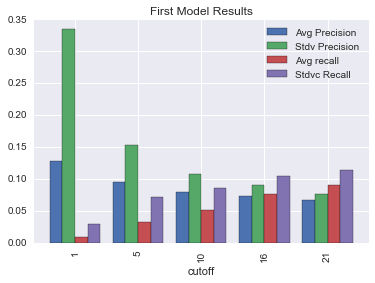

In [93]:
Model1 = Results_df.loc[Results_df['Model']=="One"]
Model1.sort_values('cutoff').plot('cutoff', kind='bar',  width=0.8, title="First Model Results");

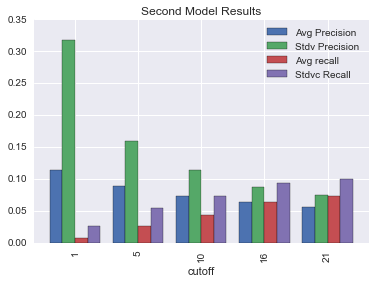

In [97]:
Model2 = Results_df.loc[Results_df['Model']=="Two"]
Model2.sort_values('cutoff').plot('cutoff', kind='bar',  width=0.8, title="Second Model Results");

**Refer first to the precision and recall results by cut off rank for the first recommender system.** The average and standard deviation for precision and recall are grouped together. Generally, we want to have high average recall with an accompanying high average precision. Meanwhile, we want to have small standard deviation for each, such that our estimates for each do not vary much.

To interpret the plots above, first compare the blue and red bars by cut-off rank to visually inspect the average precision and recall at a set number of recommendations to a user (1,5,10,16, and 21). For instance, when we give one recommendation to a user, notice that the average recall (the red bar) is very small compared to the average precision (the blue bar), and the standard deviation for the precision is large. We probably do not want to recommend only one movie at a time to a user, because we will likely not recommend a relevant movie, compared to their other previously provided ratings. Instead, we should consider recommending 10 to 16 movies at a time, since the precision and recall are closer together and the standard deviation for each is smaller.

**Now refer to the precision and recall results by cut-off rank for the second recommender system. Compare them to the first recommender system results.** There do not appear visually to be large differences in the precision and recall by each cut-off rank between the first and second recommender systems. Although, the first recommender system appears to have slightly better recall than the second recommender system. **This means that we tend to produce slightly more relevant movie ratings for a given number of movie recommendations with the the first recommender system.** However, practically speaking, there may not be a large difference in relevant movie recommendations between each recommender system.

**We will summarize the results in the next section, Modeling and Evaluation 4: Summarize the Ramifications.**

<a id="summary"></a>

### Modeling and Evaluation 4: Summarize the Ramifications

**In this section, we summarize the results between both recommender systems, including a discussion of their pros and cons.** 

First, we will discuss the pros and cons of each recommender system model.

* **The first recommender system, without the side item data, had slightly higher recall compared to the second model.** When providing 10 movie recommendations to a user, the average recall was 0.051238 and the average precision was 0.079605. This means the first recommender system is slightly more likely to provide relevant movie recommendations than the second model. However, the first recommender system also has slightly higher overall RMSE (1.05318) to determine  user rating differences in the training vs. test data.

* **The second recommender system contains additional movie genre and year information for each movie, and had a slightly lower overall RMSE (0.9325).** This means that the second model can determine rating differences between the training and test data for the users slightly better than the first model. However, the second model had slightly lower recall compared to the first model. When providing 10 movie recommendations to a user, the average recall was 0.043445 and the average precision was 0.073026.

Given that the goal is to provide relevant recommendations to users based their prior feedback (through their ratings), we must evaluate both RMSE in addition to precision and recall. After all, our recommender system needs to have an accurate sense of rating differences between the training and test data to have an idea of what relevant movie recommendations are. In this situation, one recommender system has a lower overall RMSE and the other has higher precision and recall. **This requires us to make a decision on which is more important to us, finding differences in the ratings for users in the training and test data (RMSE) or the relevance of the recommendations (average recall).** Both are important, however, our goal is to provide better recommendations. **Therefore, we decided that we would focus on having a higher precision and recall in this case, since there was not an extremely large difference in the overall RMSE between each recommender system.**

**Next, we discuss the deployment of the first recommender system model.**

<a id="deployment"></a>
<a href="#top">Back to Top</a>
## Deployment

This model can be deployed to entertainment streaming services, or film rental vending services. After removing outliers from total ratings by users, where some users had rated far too many movies than typical usage, the recommendation model improved.  There were 60 users with high amount of ratings that may have been bots who rated a large number of films in bulk. These 60 users were enough to disrupt the model, thus the model would not return as good recommendations as when they were removed.

Similarly, films with too few recommendations create noise in the model because there is insufficient information available to be able to make accurate recommendations.  If a stranger on the subway recommended a film you have not heard of, one would be reluctant to trust a stranger's preferences. In our model, films rated by five users or fewer were insufficient to make accurate recommendations to other users.

The purpose of our model is to make film recommendations unique to each customer as well. The top 10 personalized film recommendations are presented when inputting the user ID of the customer and obtaining recommendations based on films that particular client rated, and comparing rated movies of other users. The user's ID can be queried in a database and new recommendations could be provided once the user logs in so that recommendations are refreshed using any ratings the customer provided on the previous session. Depending on the platform of the service provider, the system can refresh sooner than at the start of a new session so that customers can have quicker feedback.

Other data that we found that could be useful to refine recommendations, or to find more information about our customers would be demographic information about the user.  Demographic information about gender, household size, children age ranges, the customer's age, customer locale, and the time the customer uses the service would be useful information to get a better understanding of the customers who rate films using this system.  Recommendations may further be accurate knowing some more information about the client's background.  For example, child age ranges may help give more family oriented film suggestions.

If the demographic information could be obtained, then the update would need to be done soon after it is obtained to glean new information from user demographics.  Conversely, should the demographic information not be easily obtained and our model variables remain the same, we would recommend updating the model periodically to allow newly released films to be included in the recommendation system.  The time period would depend on the number of customers and the volume of ratings generated by the customers. Therefore, service providers with fewer subscribers would update the model less frequently than services with higher subscribers to allow films to be rated. Moreover, we would caution against recommending films with few ratings as these could provide unwanted noise for the recommendation model.

Below, we give an example of how the User ID could be looked up interactively (rather than hard coding User Ids), and obtaining the top 10 recommendations for that user.


In [115]:
# Widget to be used to retrieve user input - user id
StrUserId = widgets.IntText(
    placeholder='Id',
    description='User Id:',
    disabled=False
)
StrUserId

In [116]:
#Running the selected model for the provided User Id in the widget above and print the results
UsrIdVal = StrUserId.value
rec_model2_filter = train_model2.recommend(users=[UsrIdVal])
print(rec_model2_filter)


+--------+-------------------------------+---------------+------+
| userId |             title             |     score     | rank |
+--------+-------------------------------+---------------+------+
|  432   | Lord of the Rings: The Fel... | 4.29188503059 |  1   |
|  432   | Star Wars: Episode V - The... | 4.05200138413 |  2   |
|  432   |           Gladiator           | 4.03819520403 |  3   |
|  432   | Star Wars: Episode VI - Re... | 4.00853042076 |  4   |
|  432   |       Beautiful Mind, A       | 3.94260998168 |  5   |
|  432   | Star Wars: Episode IV - A ... | 3.92314739111 |  6   |
|  432   |             Shrek             | 3.91658263704 |  7   |
|  432   |          Matrix, The          | 3.88984690854 |  8   |
|  432   |          Finding Nemo         | 3.88928635609 |  9   |
|  432   |         Monsters, Inc.        | 3.88422434979 |  10  |
+--------+-------------------------------+---------------+------+
[10 rows x 4 columns]



<a id="exceptional"></a>
<a href="#top">Back to Top</a>
## Exceptional Work


We decided to use other tools like scikit-learn tool functions and scipy.sparse library to create a similar recommendation model and compare the results.
In the following code we implemented Model-Based CF by using singular value decomposition (SVD) and Memory-Based CF by computing cosine similarity.

In [64]:
n_users = Rated_movies.userId.unique().shape[0]
n_items = Rated_movies.movieId.unique().shape[0]
print 'Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items)

Number of users = 611 | Number of movies = 1926


In [65]:
# Using scikit-learn tool cross_validation for the creation of the training and test data sets 80/20
# http://scikit-learn.org/stable/about.html#citing-scikit-learn 
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(Rated_movies, test_size=0.2)

In [66]:
# Create 2 matrices user-item 
# Dimension of then matrices is Number of users: 611 * Number of movies: 1926 
# For User-Item Collaborative Filtering the similarity values between users are measured by observing all 
# the items that are rated by both users
# Each cell will contain the rate by user to the movie, if there is not a rating value for a cell it will be set to 0.0

# Training matrix 
trainm = train_data.pivot(index='userId', columns='movieId', values='rating')
trainm.replace({np.nan:0}, inplace=True)
train_matrix = trainm.as_matrix()

# Test matrix
testm = test_data.pivot(index='userId', columns='movieId', values='rating')
testm.replace({np.nan:0}, inplace=True)
test_matrix = testm.as_matrix()
print("Training matrix")
print(train_matrix)
print("\nTest matrix")
print(test_matrix)

Training matrix
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 5.  0.  0. ...,  0.  0.  0.]]

Test matrix
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


For recommender systems the distance metric to use is **cosine similarity**, ratings are seen as vectors in n-dimensional space and the similarity is calculated based on the angle between these vectors.
We use the pairwise distance function from sklearn to calculate the cosine similarity.

In [67]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix, metric='cosine')
item_similarity = pairwise_distances(train_matrix.T, metric='cosine')
print("\n USER SIMILARITY:")
print(user_similarity)
print("\n MOVIE SIMILARITY:")
print(item_similarity)


 USER SIMILARITY:
[[  2.22044605e-16   1.00000000e+00   1.00000000e+00 ...,   9.07960437e-01
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   8.64610103e-01 ...,   9.74574331e-01
    9.00082542e-01   8.91423303e-01]
 [  1.00000000e+00   8.64610103e-01   3.33066907e-16 ...,   8.89316581e-01
    8.57115572e-01   7.78409694e-01]
 ..., 
 [  9.07960437e-01   9.74574331e-01   8.89316581e-01 ...,   0.00000000e+00
    9.42262086e-01   9.17687483e-01]
 [  1.00000000e+00   9.00082542e-01   8.57115572e-01 ...,   9.42262086e-01
    0.00000000e+00   8.43919762e-01]
 [  1.00000000e+00   8.91423303e-01   7.78409694e-01 ...,   9.17687483e-01
    8.43919762e-01   2.22044605e-16]]

 MOVIE SIMILARITY:
[[ -4.44089210e-16   6.90893914e-01   7.25231168e-01 ...,   9.20509832e-01
    9.54202695e-01   8.64750977e-01]
 [  6.90893914e-01   0.00000000e+00   8.16922452e-01 ...,   8.96880636e-01
    1.00000000e+00   9.49652600e-01]
 [  7.25231168e-01   8.16922452e-01   0.00000000e+00 ...,

We proceed to make predictions using the similarity matrices. Functions were created for predictions by user and item types.
https://cambridgespark.com/content/tutorials/implementing-your-own-recommender-systems-in-Python/index.html

In [68]:
# This functions is used to execute 
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [69]:
# Executing the above function for user and movie (item)
movie_prediction = predict(train_matrix, item_similarity, type='item')
user_prediction = predict(train_matrix, user_similarity, type='user')

In [70]:
print("\n MOVIE PREDICTION:")
print(movie_prediction)
print("\n USER PREDICTION:")
print(user_prediction)


 MOVIE PREDICTION:
[[ 0.01960648  0.01901137  0.01905719 ...,  0.01937751  0.01943812
   0.01943871]
 [ 0.09547822  0.08814101  0.09784117 ...,  0.10893286  0.10836663
   0.10760419]
 [ 0.06553221  0.06985381  0.07312251 ...,  0.07553323  0.07299016
   0.07387906]
 ..., 
 [ 0.04344112  0.04480831  0.04463509 ...,  0.04599033  0.04583899
   0.04561222]
 [ 0.04190582  0.04500699  0.0467322  ...,  0.04951487  0.04784159
   0.04910459]
 [ 0.14355564  0.15857015  0.16722491 ...,  0.17131879  0.16677519
   0.16897177]]

 USER PREDICTION:
[[  8.87374546e-01   2.67929770e-01   1.32362005e-01 ...,  -7.76732929e-02
   -2.69030705e-02   6.12371570e-03]
 [  9.59668123e-01   3.10522255e-01   2.15235313e-01 ...,   1.26574064e-02
    6.59710278e-02   1.00742777e-01]
 [  9.22445071e-01   3.17381389e-01   1.98273239e-01 ...,  -1.84946717e-02
    2.94149493e-02   6.39821270e-02]
 ..., 
 [  9.04576205e-01   2.94377286e-01   1.60072543e-01 ...,  -5.03797986e-02
    6.61064419e-04   3.34339765e-02]
 [  9.

For the evaluation of the predicted models, we used Root Mean Squared Error (RMSE) and the function form scikit-learn.

In [71]:
# RMSE for the predicted models
# We only wan to consider predicted ratings that are in the test dataset.
# using matrix with prediction[ground_truth.nonzero()] filter out all other elements in the prediction.
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [72]:
print 'User-based CF RMSE: ' + str(rmse(user_prediction, test_matrix))
print 'Movie-based CF RMSE: ' + str(rmse(movie_prediction, test_matrix))

User-based CF RMSE: 3.67325071983
Movie-based CF RMSE: 3.68884725586


Memory-based algorithms are easy to implement and produce reasonable prediction quality. But memory-based CF doesn't scale to real-world scenarios and doesn't address the well-known cold-start problem, that is when new user or new item enters the system.

Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models, but also suffer when new users or items that don't have any ratings enter the system.

Model-based Collaborative Filtering is based on matrix factorization (MF) considered as an unsupervised learning method for latent variable decomposition and dimensionality reduction. 
Matrix factorization is widely used for recommender systems, it deals better with scalability and sparsity than Memory-based CF.
In our research we found that this models learn from the user information and attributes of the items in this case movies to then predict the unknown rating through the dot product of the users and items information/attributes arrays/matrices.

For very sparse matrix, with a lot of dimensions, by doing matrix factorization is recommended to restructure the user-item matrix into low-rank structure, the matrix can be represented by the multiplication of two low-rank matrices, where the rows contain the latent vector with user information like: age, gender, zipcode, any demographic information for movies information like: lead actor, language, director, etc.  For our data set we were limited with the user information we only have userId.

The important aspect is that the CF model only uses data (user_id, movie_id, rating) to learn the latent features. If there is little data available model-based CF model will predict poorly, since it will be more difficult to learn the latent features.

Models that use both ratings and content features are called Hybrid Recommender Systems where both Collaborative Filtering and Content-based Models are combined. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based Models on their own: they are capable to address the cold-start problem better if the user doesn't have any ratings, the metadata from the user or item is used to make a prediction. 

Reference: https://cambridgespark.com/content/tutorials/implementing-your-own-recommender-systems-in-Python/index.html

In [73]:
# Calculating the sparsity of our movie data set
sparsity=round(1.0-len(Rated_movies)/float(n_users*n_items),3)
print 'The sparsity level of MovieLens-100K is ' +  str(sparsity*100) + '%'

The sparsity level of MovieLens-100K is 95.8%


For a Netflix prize competition the winner team used matrix factorization known as Singular Value Decomposition (SVD) (https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429). The general equation can be expressed as follows: X=U×S×VT

Given an m×n matrix X:
- U is an m×r orthogonal matrix
- S is an r×r diagonal matrix with non-negative real numbers on the diagonal
- VT is an r×n orthogonal matrix

Elements on the diagonal in S are known as singular values of X.

Matrix X can be factorized to U, S and V. The U matrix represents the feature vectors corresponding to the users in the hidden feature space and the V matrix represents the feature vectors corresponding to the items in the hidden feature space.

The prediction is produced by taking dot product of U, S and VT.

We executed this method in our dataset just to see what results we get, we are aware that we have very limited information from users and movies.

In [74]:
# SVD method
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_matrix, k = 10)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print 'User-based CF MSE: ' + str(rmse(X_pred, test_matrix))

User-based CF MSE: 3.59515493552


The model did slightly better. But we got better results and visualization with the use of graphlab Turi tool - https://turi.com covered in the <a href="#MandE">Modeling and Evaluation</a> section of this project.